### 1. Frame the problem and look at the big picture.


Dataset used : https://www.kaggle.com/kumarajarshi/life-expectancy-who

It is clearly a typical supervised learning task since you are given labeled training examples (each instance comes with the expected output, i.e., Life Expentancy).

Moreover, it is also a typical regression task, since you are asked to predict a value. More specifically, this is a multivariate regression problem since the system will use multiple features to make a prediction (it will use the Adult Mortality, Country,Population,Income composition of resources etc.).

Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

### Select a Performance Measure

Your next step is to select a performance measure. A typical performance measure for regression problems is the R2_Score.

### 2.Get the Data

In [11]:
#import necessary modules
import pandas as pd

life_data = pd.read_csv("Life Expectancy Data.csv")


### Take a Quick Look at the Data Structure

In [12]:
life_data.head()          #View top 5 rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
#Lets look at the columns
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Since the column names are inconsistent as some names start with capital letters and some names begins with spaces. Lets make the column name consistent by removing the leading and trailing spaces

In [14]:
#Remove Leading spaces : use lstrip() method
life_data.columns =  [names.lstrip() for names in life_data.columns]

#Remove Trailing spaces : use lstrip() method
life_data.columns =  [names.rstrip() for names in life_data.columns]

#Capliatize column name, making them consistent

life_data.columns = [names.capitalize() for names in life_data.columns]

In [15]:
#Lets view our Columns
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

 The data contains 21 columns and 2938 rows with the header row. The table contains data about:
* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
* measles (Ratio) - number of reported Measles cases per 1000 population
* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
* gdp (Ratio) - Gross Domestic Product per capita
* population (Ratio) - population of a country
* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* schooling (Ratio) - average number of years of schooling of a population

With the exclution of Country name and Status(either developed or developing) all of the data is numeric. The values are either in years, precentages, millions or dollars in the case of Gross Domestic Product (GDP)

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [16]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult mortality                    2928 non-null float64
Infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage expenditure             2938 non-null float64
Hepatitis b                        2385 non-null float64
Measles                            2938 non-null int64
Bmi                                2904 non-null float64
Under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
Hiv/aids                           2938 non-null

There are 2,934 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started.

Notice that there are missing values in Life Expentancy(our target variable),Adult mortailty, Alcohol,Hepatitis B, Bmi,Gdp Diphtheria,Hiv/aids, Population,Thinness  1-19 years,
Thinness 5-9 years, Income composition of resource, Schooling


As stated above it would be useful to change the name of the variable thinness_1-19_years to thinness_10-19_years as it is a more accurate depiction of what the variable means.

In [17]:
life_data.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

The describe() method shows a summary of the numerical attributes

In [18]:
life_data.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis b,Measles,Bmi,Under-five deaths,Polio,Total expenditure,Diphtheria,Hiv/aids,Gdp,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Note that the standard deviation of the features Infant deaths, Percentage Expenditure , Measles, Under five deaths,GDP,Population is a lot higher than the mean(more than twice). 

This implies that the data is not centered around its mean and are more spread out. Or we can say there is large variation in the data ranging from min-max.

Things that may not make sense from above:

* Adult mortality of 1? This is likely an error in measurement, but what values make sense here? May need to change to null if under a certain threshold.
* Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very high population total - this can be dealt with later.
* BMI of 1 and 87.3? Pretty sure the whole population would not exist if that were the case. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
* Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.
* GDP per capita as low as 1.68 (USD) possible? Doubtful - but perhaps values this low are outliers.
* Population of 34 for an entire country? Hmm...

Lets Plot the histogram of each attribute to get more insight of the data

In [19]:
#import 
%matplotlib inline    

import matplotlib.pyplot as plt


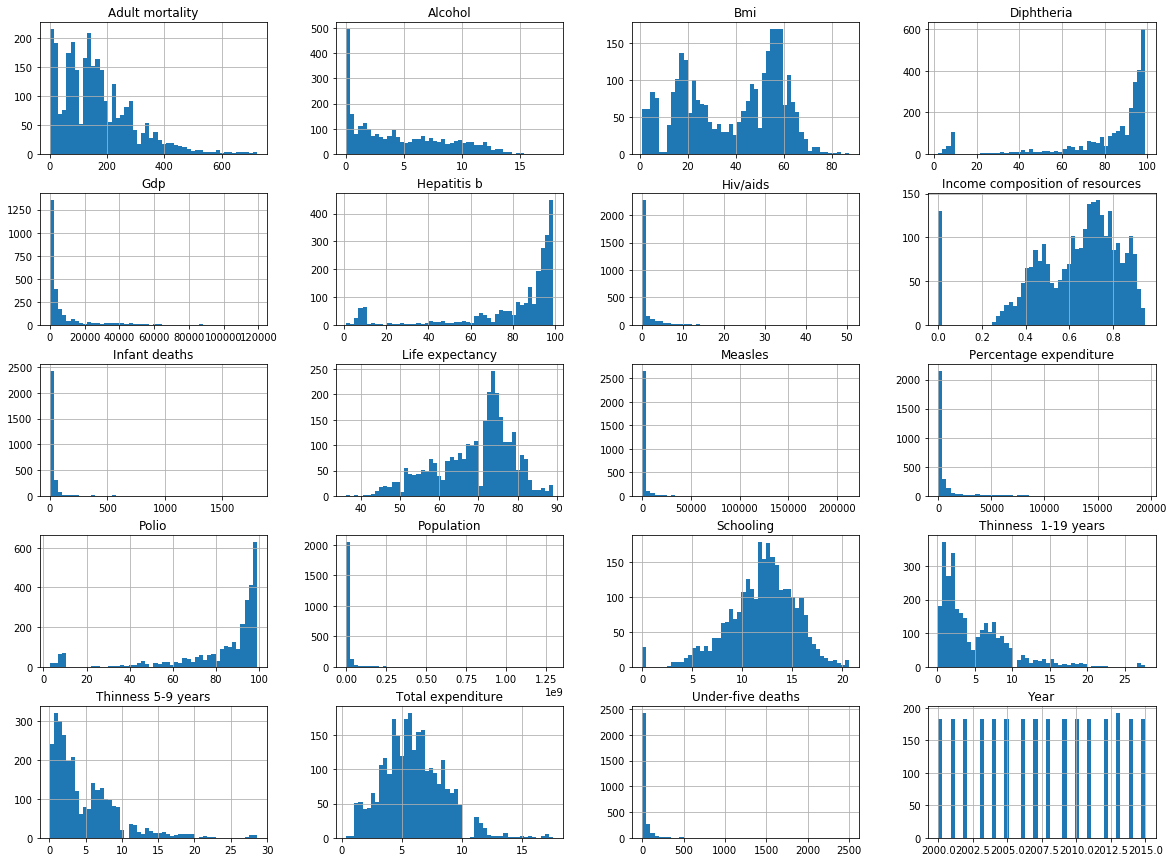

In [20]:
#creating histogram for each numeric attribute
life_data.hist(bins = 50,
               figsize = (20,15))
plt.show()

#### Conclusions:
* All these attributes are in different scales. Feature scaling is needed.
* Many histogram are tail heavily i.e. left skewed. So we need to convert them to a bell-shaped distribution.
* Diphtheria is right skewed. So we need to convert it to a bell shaped-distribution.

Lets look at our categorical attributes

In [21]:
life_data["Country"].value_counts()

Georgia                                                 16
Algeria                                                 16
Saint Lucia                                             16
Bolivia (Plurinational State of)                        16
Ukraine                                                 16
Turkmenistan                                            16
Guyana                                                  16
Ethiopia                                                16
Turkey                                                  16
Switzerland                                             16
Pakistan                                                16
Egypt                                                   16
Serbia                                                  16
United Kingdom of Great Britain and Northern Ireland    16
Solomon Islands                                         16
Montenegro                                              16
Luxembourg                                              

In [22]:
life_data["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

### EDA: Data Cleaning

In [23]:
#Copy the test data
life_copy = life_data.copy()

#### Checking for outlier
Best way to plot a box-plot

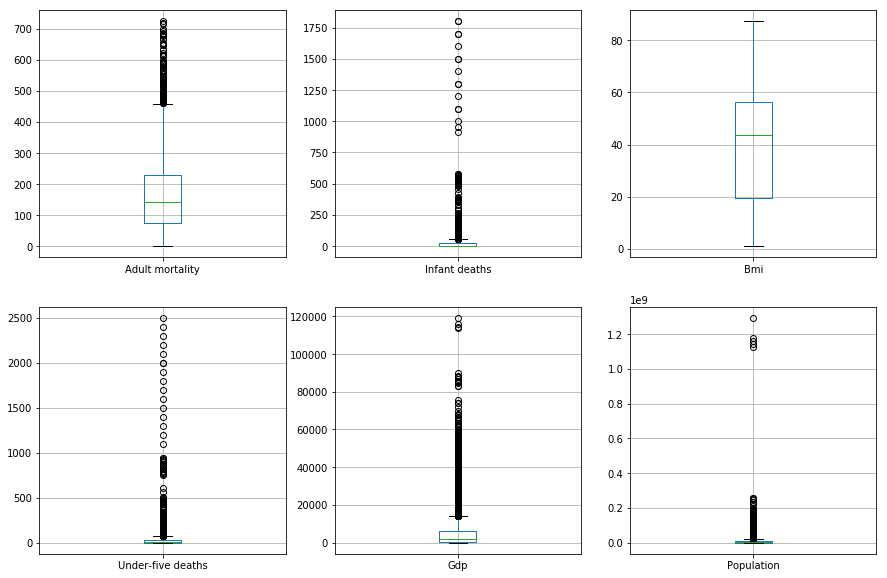

In [24]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['Adult mortality', 'Infant deaths', 'Bmi', 'Under-five deaths', 'Gdp', 'Population'],start=1):
    plt.subplot(2, 3,i)
    life_copy.boxplot(column)

There are a few of the above that could simply be outliers, but there are some that almost certainly have to be errors of some sort. Of the above variables, changes to null will be made for the following since these numbers don't make any sense:

* Adult mortality rates lower than the 5th percentile
* Infant deaths of 0
* BMI less than 10 and greater than 50
* Under Five deaths of 0

Lets replace these values with NULL

In [25]:
#import
import numpy as np

In [26]:
#Adult mortality rates lower than the 5th percentile
mortality_less_5_per = np.percentile(life_copy["Adult mortality"].dropna(),5) 
life_copy["Adult mortality"] = life_copy.apply(lambda x: np.nan if x["Adult mortality"] < mortality_less_5_per else x["Adult mortality"], axis=1)


In [27]:
#Remove Infant deaths of 0
life_copy["Infant deaths"] = life_copy["Infant deaths"].replace(0,np.nan)

In [28]:
#Remove the invalid BMI
life_copy["Bmi"] =life_copy.apply(lambda x : np.nan if (x["Bmi"] <10 or x["Bmi"] >50) else x["Bmi"],axis =1)

In [29]:
#Remove Under five deaths
life_copy["Under-five deaths"] =life_copy["Under-five deaths"].replace(0,np.nan)

#### Dealing with missing values

After making above transformations the missing values must have increased. Following function will count for issing values in the dataset.

In [30]:
def count_null(df):
    df_cols = list(df.columns)
    cols_total_count = len(df_cols)
    cols_count = 0
    
    for loc,col in enumerate(df_cols):
        null_count = df[col].isnull().sum()                                  #total null values
        total_count = df[col].isnull().count()                               #Total rows
        percent_null = round(null_count/total_count*100, 2)                  #Percentage null 
      
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [31]:
count_null(life_copy)

[iloc = 3] Life expectancy has 10 null values: 0.34% null
[iloc = 4] Adult mortality has 155 null values: 5.28% null
[iloc = 5] Infant deaths has 848 null values: 28.86% null
[iloc = 6] Alcohol has 194 null values: 6.6% null
[iloc = 8] Hepatitis b has 553 null values: 18.82% null
[iloc = 10] Bmi has 1456 null values: 49.56% null
[iloc = 11] Under-five deaths has 785 null values: 26.72% null
[iloc = 12] Polio has 19 null values: 0.65% null
[iloc = 13] Total expenditure has 226 null values: 7.69% null
[iloc = 14] Diphtheria has 19 null values: 0.65% null
[iloc = 16] Gdp has 448 null values: 15.25% null
[iloc = 17] Population has 652 null values: 22.19% null
[iloc = 18] Thinness  1-19 years has 34 null values: 1.16% null
[iloc = 19] Thinness 5-9 years has 34 null values: 1.16% null
[iloc = 20] Income composition of resources has 167 null values: 5.68% null
[iloc = 21] Schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

Earlier there were 10 missing values (for Life Expectancy feature) in our total dataset. But there are only 2 in our training set. This means our testing data consists of a lot missing values for the variable to be predicted. We will take careof this later.

Nearly half of the BMI variable's values are null, it is likely best to remove this variable altogether.

In [32]:
life_copy.drop(columns='Bmi', inplace=True)

###### Lets deal with the Missing values
Alright, so it looks like there are a lot of columns containing null values, since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

In [33]:
imputed_data = []

for year in list(life_copy.Year.unique()):
    year_data = life_copy[life_copy.Year == year].copy()
    
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [34]:
count_null(df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


### Outliers Detection

First a boxplot and histogram will be created for each continuous variable in order to visually see if outliers exist.

In [35]:
life_numeric_data = df.drop(columns=["Year","Country","Status"])

In [36]:
%matplotlib inline

def plot_numeric_data(data):
    i = 0
    for col in data.columns:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()


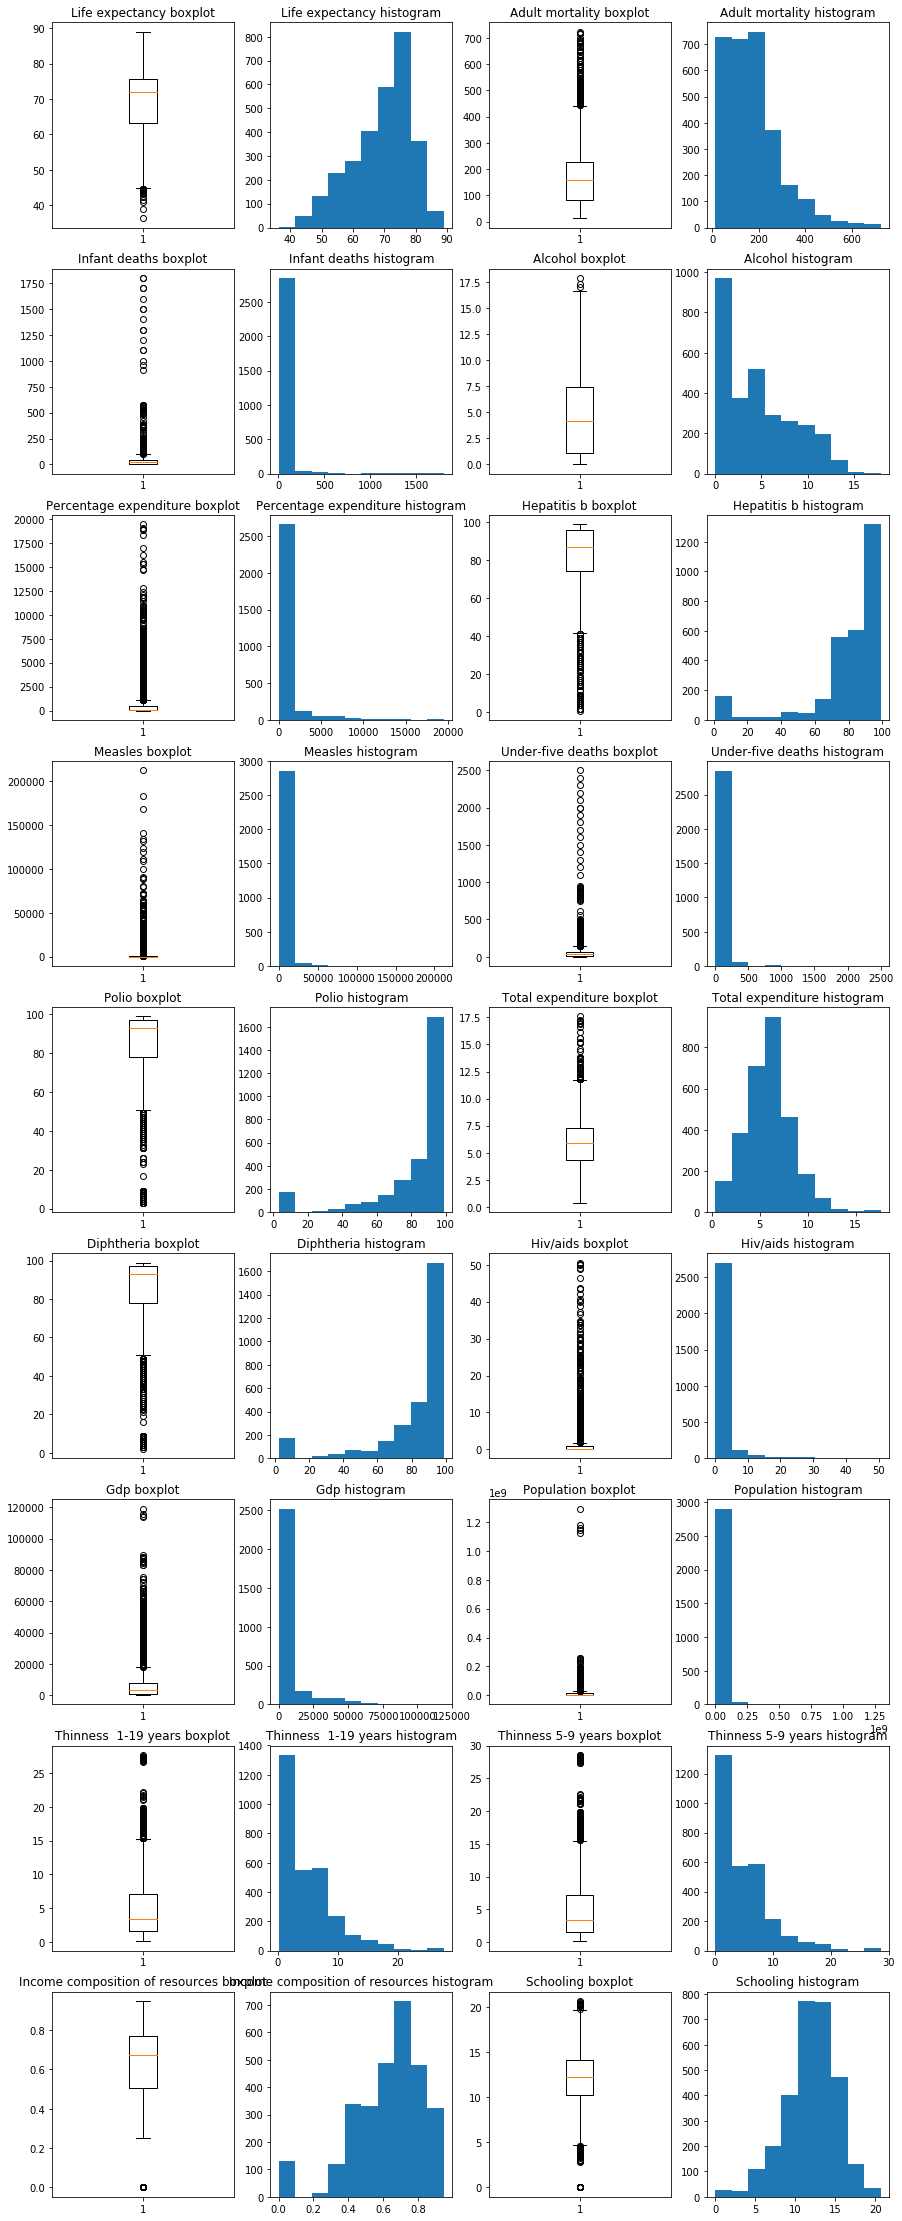

In [37]:
plt.figure(figsize=(15,40))
plot_numeric_data(life_numeric_data)

Visually, it is plain to see that there are a number of outliers for all of these variables - including the target variable, life expectancy. The same will be done statistically using Tukey's method below - outliers being considered anything outside of 1.5 times the IQR.

In [38]:
def outlier_count(col, data=df):
    
    print("\n"+15*'-' + col + 15*'-'+"\n")
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [44]:
cont_vars = list(life_numeric_data.columns)
for col in cont_vars:
    outlier_count(col)


---------------Life expectancy---------------

Number of outliers: 17
Percent of data that is outlier: 0.58%

---------------Adult mortality---------------

Number of outliers: 97
Percent of data that is outlier: 3.3%

---------------Infant deaths---------------

Number of outliers: 135
Percent of data that is outlier: 4.59%

---------------Alcohol---------------

Number of outliers: 3
Percent of data that is outlier: 0.1%

---------------Percentage expenditure---------------

Number of outliers: 389
Percent of data that is outlier: 13.24%

---------------Hepatitis b---------------

Number of outliers: 222
Percent of data that is outlier: 7.56%

---------------Measles---------------

Number of outliers: 542
Percent of data that is outlier: 18.45%

---------------Under-five deaths---------------

Number of outliers: 142
Percent of data that is outlier: 4.83%

---------------Polio---------------

Number of outliers: 279
Percent of data that is outlier: 9.5%

---------------Total expendi

Since each variable has a unique amount of outliers and also has outliers on different sides of the data, the best route to take is probably winsorizing (limiting) the values for each variable on its own until no outliers remain. The function below allows me to do exactly that by going variable by variable with the ability to use a lower limit and/or upper limit for winsorization. By default the function will show two boxplots side by side for the variable (one boxplot of the original data, and one with the winsorized change). Once a satisfactory limit is found (by visual analysis), the winsorized data will be saved in the wins_dict dictionary so the data can easily be accessed later.

In [45]:
from scipy.stats.mstats import winsorize

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

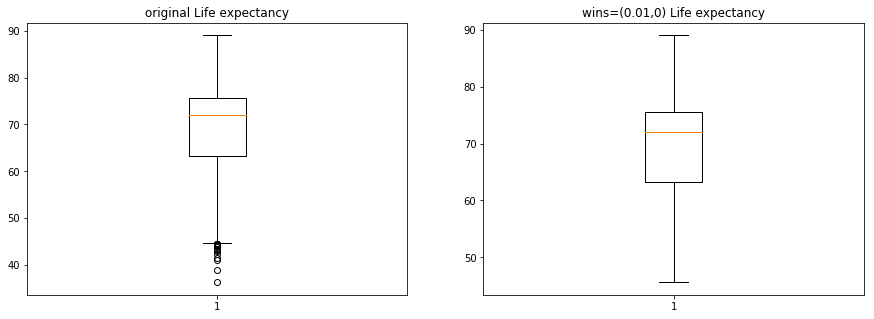

In [46]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

All the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers. Finally, small boxplots will be shown for each variable's winsorized data to show that the outliers have indeed been dealt with.

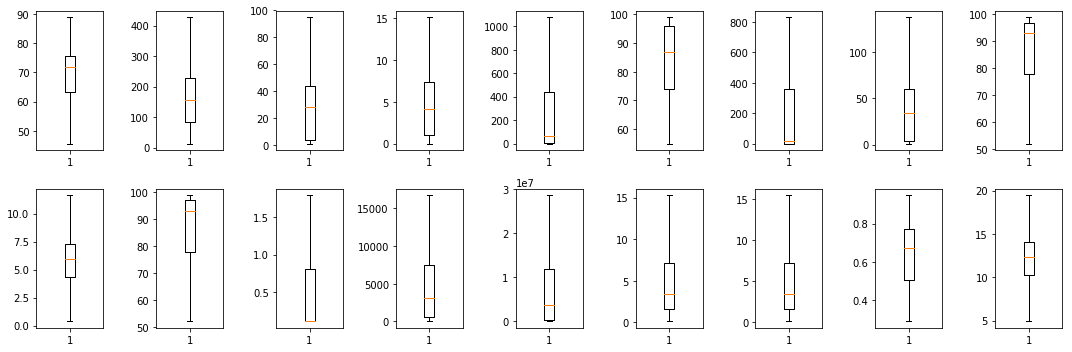

In [47]:
plt.figure(figsize=(15,5))

for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])

    plt.tight_layout()
plt.show()

In [106]:
#A new dataframe with the winsorized data 
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

#### Drop irrelevant features

In [107]:
dataset = wins_df.drop(columns= ["Year","Country"],axis = True)

In [108]:
#Dealing with Categorical data

In [109]:
status = pd.get_dummies(dataset.Status)
dataset = pd.concat([dataset, status], axis = 1)
dataset= dataset.drop(['Status'], axis=1)

In [110]:
dataset.columns

Index(['Life expectancy', 'Adult mortality', 'Infant deaths', 'Alcohol',
       'Percentage expenditure', 'Hepatitis b', 'Measles', 'Under-five deaths',
       'Polio', 'Total expenditure', 'Diphtheria', 'Hiv/aids', 'Gdp',
       'Population', 'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

### Lets Split the data into training and test data

In [111]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns = ["Life expectancy"],axis = 1),
                                                 dataset["Life expectancy"],
                                                 test_size = 0.2,
                                                 random_state = 42)

### Feature Scaling 

In [112]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)


## Train the model using Linear Regression
#### [UNDERFITTING]

In [113]:
#import necessary modules
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train_scaled,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
from sklearn.metrics import r2_score

#Make predictions
y_pred = linear_regressor.predict(X_train_scaled)

#Calculating RMSE
linear_r2_score = r2_score(y_train,y_pred)

print(linear_r2_score)

0.8516385255593645


### Better Evaluation Using Cross-Validation

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)

linear_scores = cross_val_score(linear_regressor,X_train_scaled,y_train,
                       scoring = scoring,cv=10)
linear_scores

array([0.86433058, 0.84210233, 0.86316185, 0.80767158, 0.84565993,
       0.83949808, 0.86705691, 0.85109261, 0.85056209, 0.84352192])

### Train the model using Decision Tree Classifier
#### [OVERFITTING]

In [116]:
#import necessary modules
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train_scaled,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [117]:
#Make predictions
y_pred = tree_reg.predict(X_train_scaled)

#Calculating RMSE
tree_r2_score = r2_score(y_train,y_pred)

print(tree_r2_score)

1.0


### Better Evaluation Using Cross-Validation

Clearly the Decicion Tree Regressor is Overfitting the data. Lets check the cross validation scores

In [118]:
from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)
scores = cross_val_score(tree_reg,X_train_scaled,y_train,
                       scoring = scoring,cv=10)


In [119]:
scores

array([0.903733  , 0.88707417, 0.91250116, 0.8330214 , 0.87503821,
       0.88093661, 0.88944404, 0.89948608, 0.90092732, 0.9080064 ])

### Train the model using Decision Tree Classifier
#### [Prefect Fit]

In [120]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
socre = make_scorer("r2_score")
forest_reg = RandomForestRegressor()

forest_reg.fit(X_train_scaled,y_train)



C:\Users\me\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [121]:
#Make predictions
y_pred = forest_reg.predict(X_train_scaled)
#Calculating RMSE
forest_r2_score = r2_score(y_train,y_pred)

print(forest_r2_score)

0.9902980922133557


### Better Evaluation Using Cross-Validation


In [122]:
forest_score = cross_val_score(forest_reg, X_train_scaled,y_train,
                              scoring=scoring,cv=10)

forest_score

array([0.95885954, 0.94252908, 0.95706256, 0.91565954, 0.94993174,
       0.93812785, 0.9565274 , 0.93061342, 0.93684649, 0.9527449 ])

In [123]:
## Done... Le

In [124]:
X_test_scaled = std_scaler.fit_transform(X_test)
y_pred = forest_reg.predict(X_test_scaled)

#Calculating RMSE
tree_r2_score = r2_score(y_test,y_pred)

print("R^2 score: %.2f"%tree_r2_score)

R^2 score: 0.94
